<a href="https://colab.research.google.com/github/ellie-winer/AnalyzeandVisualizeSpaceRace-Portfolio18/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [6]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [7]:
%pip install --upgrade plotly

### Import Statements

In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [10]:
df_data = pd.read_csv('mission_launches.csv')


# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [11]:
print(f"shape of data: {df_data.shape}\n column names: {df_data.columns}\n NaN values: {df_data.isna().values.any()}\n duplicates: {df_data.duplicated().values.any()}")

shape of data: (4324, 9)
 column names: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')
 NaN values: True
 duplicates: False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [12]:
clean_df = df_data.dropna()

In [13]:
print(f"NaN: {clean_df.isna().values.any()}")

NaN: False


## Descriptive Statistics

In [14]:
print(f"description:{clean_df.describe()}")

description:       Unnamed: 0.1  Unnamed: 0
count        964.00      964.00
mean         858.49      858.49
std          784.21      784.21
min            0.00        0.00
25%          324.75      324.75
50%          660.50      660.50
75%        1,112.00    1,112.00
max        4,020.00    4,020.00


In [15]:
print(f"top 5 organizations for launches:{clean_df['Organisation'].value_counts().head(5)}")
clean_df['Date']= pd.to_datetime(clean_df['Date'], errors='coerce')
clean_df['Year'] = clean_df['Date'].dt.year
print(f"average number of launches per year: {clean_df.groupby('Year').size().mean()}")

top 5 organizations for launches:Organisation
CASC           158
NASA           149
SpaceX          99
ULA             98
Arianespace     96
Name: count, dtype: int64
average number of launches per year: 19.16


<ipython-input-15-68494d97352b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Date']= pd.to_datetime(clean_df['Date'], errors='coerce')
<ipython-input-15-68494d97352b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Year'] = clean_df['Date'].dt.year


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [16]:
launches_by_org = clean_df['Organisation'].value_counts()

<ipython-input-17-6efc4b0c659a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=launches_by_org.index, y=launches_by_org.values, palette="rocket")


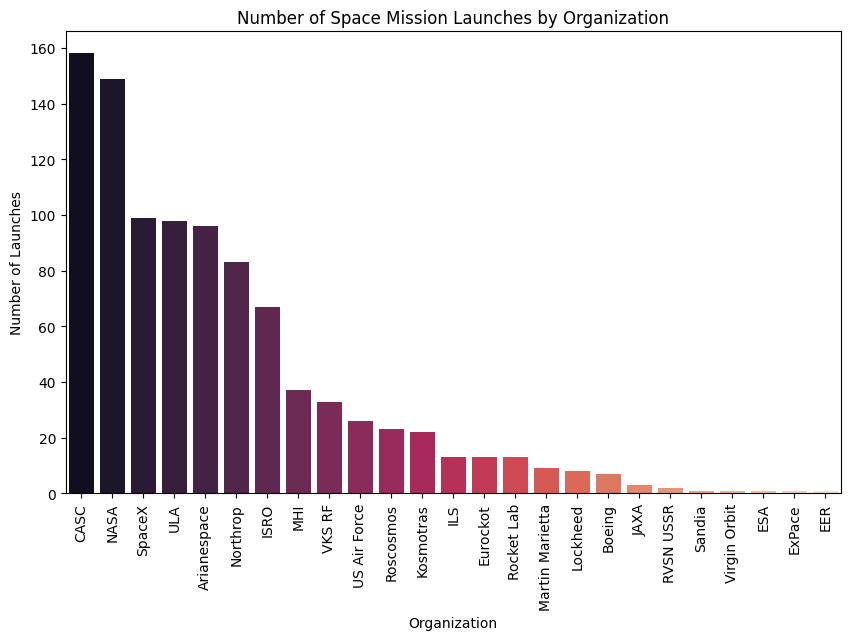

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=launches_by_org.index, y=launches_by_org.values, palette="rocket")
plt.xticks(rotation=90)
plt.title('Number of Space Mission Launches by Organization')
plt.xlabel('Organization')
plt.ylabel('Number of Launches')
plt.show()


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [18]:
rocket_status_counts = clean_df['Rocket_Status'].value_counts()
active_rockets = rocket_status_counts.get('StatusActive', 0)
decommissioned_rockets = rocket_status_counts.get('StatusRetired', 0)

In [19]:
print(f"Active Rockets: {active_rockets}")
print(f"Decommissioned Rockets: {decommissioned_rockets}")

Active Rockets: 586
Decommissioned Rockets: 378


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [20]:
mission_status_counts = clean_df['Mission_Status'].value_counts()
successful_missions = mission_status_counts.get('Success', 0)
failed_missions = mission_status_counts.get('Failure', 0)

In [21]:
print(f"Successful Missions: {successful_missions}")
print(f"Failed Missions: {failed_missions}")

Successful Missions: 910
Failed Missions: 36


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55],
 [Text(0, 0, '50.0'),
  Text(1, 0, '29.75'),
  Text(2, 0, '65.0'),
  Text(3, 0, '145.0'),
  Text(4, 0, '64.68'),
  Text(5, 0, '48.5'),
  Text(6, 0, '90.0'),
  Text(7, 0, '46.0'),
  Text(8, 0, '28.3'),
  Text(9, 0, '29.15'),
  Text(10, 0, '7.5'),
  Text(11, 0, '30.8'),
  Text(12, 0, '5.3'),
  Text(13, 0, '12.0'),
  Text(14, 0, '112.5'),
  Text(15, 0, '120.0'),
  Text(16, 0, '153.0'),
  Text(17, 0, '200.0'),
  Text(18, 0, '85.0'),
  Text(19, 0, '115.0'),
  Text(20, 0, '41.8'),
  Text(21, 0, '21.0'),
  Text(22, 0, '31.0'),
  Text(23, 0, '40.0'),
  Text(24, 0, '164.0'),
  Text(25, 0, '62.0'),
  Text(26, 0, '37.0'),
  Text(27, 0, '350.0'),
  Text(28, 0, '39.0'),
  Text(

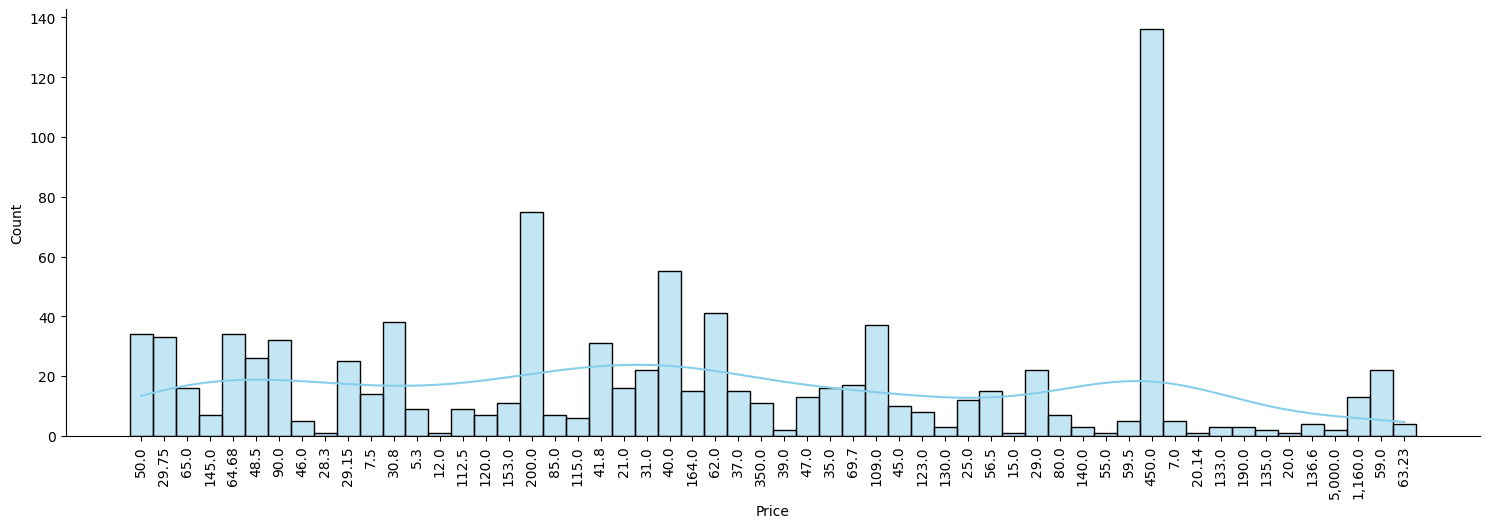

In [22]:
clean_df_price = clean_df['Price'].dropna()
sns.displot(clean_df_price, kde=True, color='skyblue', aspect=3)
plt.xticks(rotation=90)
##needed to get xtick labels to be written vertically to see them all and helpful to expand xaxis width using aspect

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [23]:
country_mapping = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}
clean_df['Country'] = clean_df['Location'].apply(lambda loc: loc.split(",")[-1].strip())

clean_df['Country'] = clean_df['Country'].replace(country_mapping)
clean_df['Country Code'] = clean_df['Country'].apply(lambda x: countries.get(x).alpha3 if countries.get(x) else None)
launches_by_country = clean_df.groupby('Country Code').size().reset_index(name='Number of Launches')


<ipython-input-23-895b88371c3d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Country'] = clean_df['Location'].apply(lambda loc: loc.split(",")[-1].strip())
<ipython-input-23-895b88371c3d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Country'] = clean_df['Country'].replace(country_mapping)
<ipython-input-23-895b88371c3d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [24]:
fig = px.choropleth(
    launches_by_country,
    locations='Country Code',
    locationmode='ISO-3',
    color='Number of Launches',
    color_continuous_scale=px.colors.sequential.matter,
    title="Number of Space launches by Country",
    scope='world'
)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [25]:
failures_df = clean_df[clean_df['Mission_Status'] == 'Failure']
failures_by_country = failures_df.groupby('Country Code').size().reset_index(name='Number of Failures')

In [26]:
fig = px.choropleth(
    failures_by_country,
    locations='Country Code',
    locationmode='ISO-3',
    color='Number of Failures',
    color_continuous_scale=px.colors.sequential.matter,
    title="Number of Launch Failures by Country",
    scope='world'
)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [27]:
fig = px.sunburst(
    clean_df,
    path=['Country', 'Organisation', 'Mission_Status'],
    title='Sunburst Chart of Launches by Country, Organisation, and Mission Status',
)
fig.show()

In [28]:
##no need to add value= for sunburst, so no need to calculate number of success vs failure

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [29]:
clean_df['Price'] = pd.to_numeric(clean_df['Price'], errors='coerce')
total_spent_by_org = clean_df.groupby('Organisation')['Price'].sum().reset_index()
total_spent_by_org.columns = ['Organisation', 'Total Amount Spent (USD Millions)']
print(total_spent_by_org)

       Organisation  Total Amount Spent (USD Millions)
0       Arianespace                          16,345.00
1            Boeing                           1,241.00
2              CASC                           6,340.26
3               EER                              20.00
4               ESA                              37.00
5          Eurockot                             543.40
6            ExPace                              28.30
7               ILS                           1,320.00
8              ISRO                           2,177.00
9              JAXA                             168.00
10        Kosmotras                             638.00
11         Lockheed                             280.00
12              MHI                           3,532.50
13  Martin Marietta                             721.40
14             NASA                          61,200.00
15         Northrop                           3,930.00
16        RVSN USSR                               0.00
17       R

<ipython-input-29-b020c614963c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
total_spent_by_org = total_spent_by_org.sort_values(by='Total Amount Spent (USD Millions)', ascending=False)


In [31]:
fig = px.bar(
    total_spent_by_org,
    x='Organisation',
    y='Total Amount Spent (USD Millions)',
    title='Total Amount of Money Spent by Organisation on Space Missions',
    labels={'Total Amount Spent (USD Millions)': 'Total Amount Spent (USD Millions)', 'Organisation': 'Organisation'},
    text='Total Amount Spent (USD Millions)',
)
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [32]:
org_spending = clean_df.groupby('Organisation').agg(
    Total_Spent=('Price', 'sum'),
    Launch_Count=('Price', 'count')
).reset_index()
org_spending['Average_Spent_Per_Launch'] = org_spending['Total_Spent'] / org_spending['Launch_Count']
org_spending.columns = ['Organisation', 'Total Amount Spent (USD Millions)', 'Number of Launches', 'Average Amount Spent Per Launch (USD Millions)']
print(org_spending)

       Organisation  Total Amount Spent (USD Millions)  Number of Launches  \
0       Arianespace                          16,345.00                  96   
1            Boeing                           1,241.00                   7   
2              CASC                           6,340.26                 158   
3               EER                              20.00                   1   
4               ESA                              37.00                   1   
5          Eurockot                             543.40                  13   
6            ExPace                              28.30                   1   
7               ILS                           1,320.00                  13   
8              ISRO                           2,177.00                  67   
9              JAXA                             168.00                   3   
10        Kosmotras                             638.00                  22   
11         Lockheed                             280.00          

In [33]:
org_spending = org_spending.sort_values(by='Average Amount Spent Per Launch (USD Millions)', ascending=False)

In [34]:
fig = px.bar(
    org_spending,
    x='Organisation',
    y='Average Amount Spent Per Launch (USD Millions)',
    title='Average Amount of Money Spent by Organisation per Launch',
    labels={'Average Amount Spent Per Launch (USD Millions)': 'Average Amount Spent Per Launch (USD Millions)', 'Organisation': 'Organisation'},
    text='Average Amount Spent Per Launch (USD Millions)',
)
fig.show()

# Chart the Number of Launches per Year

In [35]:
##Year defined above
launches_per_year = clean_df.groupby('Year').size().reset_index(name='Number of Launches')
print(launches_per_year)


       Year  Number of Launches
0  1,964.00                   2
1  1,965.00                   2
2  1,966.00                   3
3  1,967.00                   7
4  1,968.00                  10
5  1,969.00                   8
6  1,970.00                   1
7  1,971.00                   2
8  1,972.00                   2
9  1,973.00                   1
10 1,981.00                   2
11 1,982.00                   4
12 1,983.00                   5
13 1,984.00                   6
14 1,985.00                  10
15 1,986.00                   3
16 1,987.00                   3
17 1,988.00                   5
18 1,989.00                   6
19 1,990.00                  11
20 1,991.00                   7
21 1,992.00                  12
22 1,993.00                  12
23 1,994.00                  16
24 1,995.00                  10
25 1,996.00                  14
26 1,997.00                  18
27 1,998.00                  18
28 1,999.00                  13
29 2,000.00                  16
30 2,001

In [36]:
fig = px.line(
    launches_per_year,
    x='Year',
    y='Number of Launches',
    title='Number of Launches per Year',
    labels={'Number of Launches': 'Number of Launches', 'Year': 'Year'},
)
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [37]:
clean_df['YearMonth'] = clean_df['Date'].dt.to_period('M')
launches_per_month = clean_df.groupby('YearMonth').size().reset_index(name='Number of Launches')
launches_per_month['YearMonth'] = launches_per_month['YearMonth'].astype(str)
launches_per_month['Rolling Average'] = launches_per_month['Number of Launches'].rolling(window=3).mean()
print(launches_per_month)

    YearMonth  Number of Launches  Rolling Average
0     1964-09                   1              NaN
1     1964-12                   1              NaN
2     1965-02                   1             1.00
3     1965-05                   1             1.00
4     1966-07                   1             1.00
..        ...                 ...              ...
381   2020-04                   4             6.00
382   2020-05                   6             5.33
383   2020-06                   7             5.67
384   2020-07                  12             8.33
385   2020-08                   2             7.00

[386 rows x 3 columns]


<ipython-input-37-8b717f6812ba>:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

<ipython-input-37-8b717f6812ba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
highest_launch_month = launches_per_month.loc[launches_per_month['Number of Launches'].idxmax()]
print(f"The month with the highest number of launches: {highest_launch_month['YearMonth']} with {highest_launch_month['Number of Launches']} launches.")

The month with the highest number of launches: 2017-06 with 12 launches.


In [39]:
fig = px.line(
    launches_per_month,
    x='YearMonth',
    y='Number of Launches',
    title='Number of Launches Month-on-Month with Rolling Average',
    labels={'Number of Launches': 'Number of Launches', 'YearMonth': 'Month'},
)
fig.add_scatter(x=launches_per_month['YearMonth'].astype(str), y=launches_per_month['Rolling Average'],
                 mode='lines', name='Rolling Average', line=dict(color='red', width=2, dash='dash'))
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [40]:
clean_df['Month'] = clean_df['Date'].dt.month
launches_per_month = clean_df.groupby('Month').size().reset_index(name='Number of Launches')
print(launches_per_month)

    Month  Number of Launches
0    1.00                  66
1    2.00                  60
2    3.00                  77
3    4.00                  88
4    5.00                  86
5    6.00                  85
6    7.00                  77
7    8.00                  82
8    9.00                  87
9   10.00                  83
10  11.00                  76
11  12.00                  91


<ipython-input-40-7fe45236296f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
fig = px.bar(
    launches_per_month,
    x='Month',
    y='Number of Launches',
    title='Number of Launches per Month',
    labels={'Number of Launches': 'Number of Launches', 'Month': 'Month'},
)
fig.update_xaxes(
    tickmode='array',
    tickvals=list(range(1, 13)),
    ticktext=['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
)
fig.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [42]:
clean_df = clean_df.dropna(subset=['Price'])
print(clean_df['Price'].head())
#check datatype

0    50.00
1    29.75
3    65.00
4   145.00
5    64.68
Name: Price, dtype: float64


In [43]:
average_price_per_year = clean_df.groupby(clean_df['Date'].dt.year)['Price'].mean().reset_index(name='Average Price')
print(average_price_per_year)

       Date  Average Price
0  1,964.00          63.23
1  1,965.00          63.23
2  1,966.00          59.00
3  1,967.00          59.00
4  1,968.00          59.00
5  1,969.00          59.00
6  1,981.00         450.00
7  1,982.00         345.20
8  1,983.00         366.16
9  1,984.00         380.13
10 1,985.00         408.08
11 1,986.00         310.27
12 1,987.00          30.80
13 1,988.00         241.45
14 1,989.00         380.83
15 1,990.00         289.15
16 1,991.00         391.43
17 1,992.00         319.35
18 1,993.00         276.73
19 1,994.00         221.51
20 1,995.00         325.00
21 1,996.00         243.20
22 1,997.00         221.74
23 1,998.00         152.12
24 1,999.00         136.17
25 2,000.00         173.12
26 2,001.00         290.70
27 2,002.00         195.37
28 2,003.00          80.51
29 2,004.00          92.74
30 2,005.00          95.79
31 2,006.00         138.61
32 2,007.00         125.70
33 2,008.00         129.75
34 2,009.00         180.29
35 2,010.00         148.40
3

In [44]:
fig = px.line(
    average_price_per_year,
    x='Date',
    y='Average Price',
    title='Average Launch Price Over Time',
    labels={'Average Price': 'Average Launch Price (USD Millions)', 'Date': 'Year'},
)
fig.show()

In [45]:
#had to use dropna Price data so that gaps were not present in graph

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [46]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
launches_per_organisation = df_data['Organisation'].value_counts().reset_index()
launches_per_organisation.columns = ['Organisation', 'Number of Launches']
top_10_organisations = launches_per_organisation.nlargest(10, 'Number of Launches')['Organisation']
print(top_10_organisations)

0           RVSN USSR
1         Arianespace
2                CASC
3    General Dynamics
4                NASA
5              VKS RF
6        US Air Force
7                 ULA
8              Boeing
9     Martin Marietta
Name: Organisation, dtype: object


In [47]:
filtered_df = df_data[df_data['Organisation'].isin(top_10_organisations)]
filtered_df['Year'] = filtered_df['Date'].dt.year
launches_per_year = filtered_df.groupby(['Year', 'Organisation']).size().reset_index(name='Launches')
for org in top_10_organisations:
    org_launches = launches_per_year[launches_per_year['Organisation'] == org]
    print(f"Launches for {org}:")
    print(org_launches)
    print()

Launches for RVSN USSR:
        Year Organisation  Launches
0   1,957.00    RVSN USSR         2
2   1,958.00    RVSN USSR         5
6   1,959.00    RVSN USSR         4
10  1,960.00    RVSN USSR         8
14  1,961.00    RVSN USSR         9
18  1,962.00    RVSN USSR        22
22  1,963.00    RVSN USSR        23
26  1,964.00    RVSN USSR        33
31  1,965.00    RVSN USSR        52
36  1,966.00    RVSN USSR        50
41  1,967.00    RVSN USSR        73
46  1,968.00    RVSN USSR        77
51  1,969.00    RVSN USSR        82
57  1,970.00    RVSN USSR        86
63  1,971.00    RVSN USSR        90
69  1,972.00    RVSN USSR        76
75  1,973.00    RVSN USSR        81
80  1,974.00    RVSN USSR        82
86  1,975.00    RVSN USSR        88
91  1,976.00    RVSN USSR        93
96  1,977.00    RVSN USSR        92
101 1,978.00    RVSN USSR        68
105 1,979.00    RVSN USSR        33
109 1,980.00    RVSN USSR        38
114 1,981.00    RVSN USSR        46
120 1,982.00    RVSN USSR        53
126 

<ipython-input-47-bd52bb6de62c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:

years = filtered_df['Date'].dt.year.unique()
years.sort()
all_years = pd.DataFrame({'Year': years})
all_combinations = pd.MultiIndex.from_product([all_years['Year'], top_10_organisations], names=['Year', 'Organisation']).to_frame(index=False)
launches_by_year_org = filtered_df.groupby([filtered_df['Date'].dt.year, 'Organisation']).size().reset_index(name='Number of Launches')
pivot_df = launches_by_year_org.pivot(index='Date', columns='Organisation', values='Number of Launches').fillna(0)
print(launches_by_year_org)


        Date      Organisation  Number of Launches
0   1,957.00         RVSN USSR                   2
1   1,958.00              NASA                   2
2   1,958.00         RVSN USSR                   5
3   1,958.00      US Air Force                   2
4   1,959.00  General Dynamics                   1
..       ...               ...                 ...
317 2,019.00            VKS RF                   8
318 2,020.00       Arianespace                   4
319 2,020.00              CASC                  19
320 2,020.00               ULA                   4
321 2,020.00            VKS RF                   3

[322 rows x 3 columns]


In [49]:
fig = px.line(
    launches_by_year_org,
    x='Date',
    y='Number of Launches',
    color='Organisation',
    title='Number of Launches Over Time by Top 10 Organisations',
    labels={'Number of Launches': 'Number of Launches', 'Date': 'Year'},
)
fig.show()

In [50]:
##used not clean_df data because many prices are not shown for 1970s and other dates and it is not relflective of actual total launches

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [51]:
#need to redo country mapping from above because were not using clean_df because we want all possible launches even if there is no price
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce').dt.tz_localize(None)

country_mapping = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}

df_data['Country'] = df_data['Location'].apply(lambda loc: loc.split(",")[-1].strip())

df_data['Country'] = df_data['Country'].replace(country_mapping)
print("Updated Country Column:")
print(df_data['Country'].unique())

def get_country_code(country_name):
    try:
        return countries.get(country_name).alpha3
    except KeyError:
        return None

df_data['Country_Code'] = df_data['Country'].apply(get_country_code)

print("Unique Country Codes in df_data:")
print(df_data['Country_Code'].unique())

Updated Country Column:
['USA' 'China' 'Kazakhstan' 'Japan' 'Israel' 'New Zealand'
 'Russian Federation' 'Iran' 'France' 'India' 'North Korea'
 'Pacific Ocean' 'South Korea' 'Brazil' 'Kenya' 'Australia']
Unique Country Codes in df_data:
['USA' 'CHN' 'KAZ' 'JPN' 'ISR' 'NZL' 'RUS' None 'FRA' 'IND' 'BRA' 'KEN'
 'AUS']


In [52]:
cold_war_countries = ['USA', 'RUS', 'KAZ']
cold_war_start = 1947
cold_war_end = 1991
cold_war_df = df_data[
    (df_data['Country_Code'].isin(cold_war_countries)) &
    (df_data['Date'].dt.year >= cold_war_start) &
    (df_data['Date'].dt.year <= cold_war_end)
]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [53]:
cold_war_df['Country_Code'] = cold_war_df['Country_Code'].replace({'RUS': 'USSR', 'KAZ': 'USSR'})
launch_counts = cold_war_df['Country_Code'].value_counts().reset_index()
launch_counts.columns = ['Country_Code', 'Total_Launches']

<ipython-input-53-1ddc9d893c5b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
fig = px.pie(launch_counts,
             values='Total_Launches',
             names='Country_Code',
             title='Total Number of Launches: USA vs USSR (Including Kazakhstan)',
             color='Country_Code',
             color_discrete_map={'USA': 'blue', 'USSR': 'red'})
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [55]:
cold_war_df['Year'] = cold_war_df['Date'].dt.year

yearly_launches = cold_war_df.groupby(['Year', 'Country_Code']).size().reset_index(name='Total_Launches')


<ipython-input-55-2acafb3e9dd9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
fig = px.line(yearly_launches,
              x='Year',
              y='Total_Launches',
              color='Country_Code',
              title='Total Number of Launches Year-on-Year: USA vs USSR (Including Kazakhstan)',
              labels={'Total_Launches': 'Total Launches', 'Year': 'Year'},
              markers=True)

fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [57]:
failures_df = cold_war_df[cold_war_df['Mission_Status'].str.contains('Failure', na=False)]
yearly_failures = failures_df.groupby(['Year', 'Country_Code']).size().reset_index(name='Total_Failures')


In [58]:
fig = px.line(yearly_failures,
              x='Year',
              y='Total_Failures',
              color='Country_Code',
              title='Total Number of Mission Failures Year-on-Year: USA vs USSR (Including Kazakhstan)',
              labels={'Total_Failures': 'Total Failures', 'Year': 'Year'},
              markers=True)
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [59]:
cold_war_df['Failure'] = cold_war_df['Mission_Status'].str.contains('Failure', na=False)


<ipython-input-59-ed1ea062efa7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
yearly_stats = cold_war_df.groupby(['Year', 'Country_Code']).agg(
    Total_Launches=('Failure', 'count'),
    Total_Failures=('Failure', 'sum')
).reset_index()

yearly_stats['Percentage_Failures'] = (yearly_stats['Total_Failures'] / yearly_stats['Total_Launches']) * 100

In [61]:
fig = px.line(yearly_stats,
              x='Year',
              y='Percentage_Failures',
              color='Country_Code',
              title='Percentage of Failures Year-on-Year: USA vs USSR (Including Kazakhstan)',
              labels={'Percentage_Failures': 'Percentage of Failures (%)', 'Year': 'Year'},
              markers=True)
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [62]:
df_data['Year'] = df_data['Date'].dt.year
yearly_launches = df_data.groupby(['Year', 'Country_Code']).size().reset_index(name='Total_Launches')

leading_countries = yearly_launches.loc[yearly_launches.groupby('Year')['Total_Launches'].idxmax()]

In [63]:
fig = px.bar(leading_countries,
             x='Year',
             y='Total_Launches',
             color='Country_Code',
             title='Leading Country by Total Number of Launches Year-on-Year (Up to 2020)',
             labels={'Total_Launches': 'Total Number of Launches', 'Year': 'Year'})

fig.show()

print(leading_countries)

        Year Country_Code  Total_Launches
0   1,957.00          KAZ               2
3   1,958.00          USA              17
5   1,959.00          USA              16
7   1,960.00          USA              30
10  1,961.00          USA              43
..       ...          ...             ...
347 2,016.00          USA              25
355 2,017.00          USA              29
356 2,018.00          CHN              39
364 2,019.00          CHN              34
372 2,020.00          CHN              22

[64 rows x 3 columns]


In [64]:
successful_missions = df_data[df_data['Mission_Status'] == 'Success']
yearly_successful_launches = successful_missions.groupby(['Year', 'Country_Code']).size().reset_index(name='Total_Successful_Launches')
leading_successful_countries = yearly_successful_launches.loc[yearly_successful_launches.groupby('Year')['Total_Successful_Launches'].idxmax()]

fig = px.bar(leading_successful_countries,
             x='Year',
             y='Total_Successful_Launches',
             color='Country_Code',
             title='Leading Country by Total Number of Successful Launches Year-on-Year (Up to 2020)',
             labels={'Total_Successful_Launches': 'Total Number of Successful Launches', 'Year': 'Year'})
fig.show()


print(leading_successful_countries)


        Year Country_Code  Total_Successful_Launches
0   1,957.00          KAZ                          2
2   1,958.00          USA                          5
4   1,959.00          USA                          6
6   1,960.00          USA                         16
8   1,961.00          USA                         27
..       ...          ...                        ...
324 2,016.00          USA                         24
331 2,017.00          USA                         29
332 2,018.00          CHN                         38
340 2,019.00          CHN                         32
355 2,020.00          USA                         20

[64 rows x 3 columns]


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [65]:
yearly_launches = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='Total_Launches')
dominant_organizations = yearly_launches.loc[yearly_launches.groupby('Year')['Total_Launches'].idxmax()]
fig = px.bar(dominant_organizations,
             x='Year',
             y='Total_Launches',
             color='Organisation',
             title='Dominant Organisation by Total Number of Launches Year-on-Year',
             labels={'Total_Launches': 'Total Number of Launches', 'Year': 'Year'})
fig.show()
print(dominant_organizations)

        Year  Organisation  Total_Launches
0   1,957.00     RVSN USSR               2
2   1,958.00          AMBA               7
10  1,959.00  US Air Force              10
15  1,960.00  US Air Force              21
19  1,961.00  US Air Force              23
..       ...           ...             ...
554 2,016.00          CASC              22
580 2,017.00        SpaceX              18
585 2,018.00          CASC              37
601 2,019.00          CASC              27
618 2,020.00          CASC              19

[64 rows x 3 columns]


In [66]:
dominant_70s = dominant_organizations[dominant_organizations['Year'].between(1970, 1979)]
dominant_80s = dominant_organizations[dominant_organizations['Year'].between(1980, 1989)]

dominant_organization_70s = dominant_70s['Organisation'].mode()[0] if not dominant_70s.empty else "No Data"
dominant_organization_80s = dominant_80s['Organisation'].mode()[0] if not dominant_80s.empty else "No Data"

print(f"\nDominant Organization in the 1970s: {dominant_organization_70s}")
print(f"Dominant Organization in the 1980s: {dominant_organization_80s}")


Dominant Organization in the 1970s: RVSN USSR
Dominant Organization in the 1980s: RVSN USSR


In [67]:
dominant_2018 = dominant_organizations[dominant_organizations['Year'] == 2018]
dominant_2019 = dominant_organizations[dominant_organizations['Year'] == 2019]
dominant_2020 = dominant_organizations[dominant_organizations['Year'] == 2020]

print(f"Dominant Organization in 2018: {dominant_2018['Organisation'].values[0] if not dominant_2018.empty else 'No Data'}")
print(f"Dominant Organization in 2019: {dominant_2019['Organisation'].values[0] if not dominant_2019.empty else 'No Data'}")
print(f"Dominant Organization in 2020: {dominant_2020['Organisation'].values[0] if not dominant_2020.empty else 'No Data'}")

Dominant Organization in 2018: CASC
Dominant Organization in 2019: CASC
Dominant Organization in 2020: CASC
